In [66]:
import pandas as pd
import latent_calendar as lc
import matplotlib.pyplot as plt
# Import the data
actor_vial_df = pd.read_csv("data/actor_vial.csv")
vehiculos_df = pd.read_csv("data/vehiculos.csv")
siniestros_df = pd.read_csv("data/siniestros.csv")
hipothesis_df = pd.read_csv("data/hipothesis.csv")

In [67]:
# create dfs out of 2019 data

def make_date(df):
    df["datetime"] = pd.to_datetime(df["FECHA"], format="mixed")
    
def make_datetime(df):
    df["datetime"] = pd.to_datetime(df["FECHA"].str.cat(df["HORA"], sep=" "), format="mixed")

def clean_direccion(data):
     return " ".join(data.split()[:-1])
    


In [68]:
siniestros_df['DIRECCION_BASE'] = siniestros_df['DIRECCION'].apply(clean_direccion)
make_datetime(siniestros_df)


In [416]:
def add_siniestros_to_df2019(df):
    common_keys = ['CODIGO_ACCIDENTE','FECHA']
    merged_inner = pd.merge(left=df, right=siniestros_df, left_on=common_keys, right_on=common_keys)
    return merged_inner.loc[merged_inner["datetime"].between("2019-01-01","2020-01-01")]

def add_siniestros_to_df(df):
    common_keys = ['CODIGO_ACCIDENTE','FECHA']
    merged_inner = pd.merge(left=df, 
                            right = siniestros_df, 
                            left_on=common_keys, right_on=common_keys)
    return merged_inner 

In [70]:
siniestros_2019 = siniestros_df.loc[siniestros_df["datetime"].between("2019-01-01","2020-01-01")]

In [473]:
# actor_vial_2019=add_siniestros_to_df2019(actor_vial_df)
# vehiculos_2019 = add_siniestros_to_df2019(vehiculos_df)
# hipothesis_2019 = add_siniestros_to_df2019(hipothesis_df)

actor_vial_s = add_siniestros_to_df(actor_vial_df)
vehiculos_s = add_siniestros_to_df(vehiculos_df)
hipothesis_s = add_siniestros_to_df(hipothesis_df)


In [227]:
siniestros_2019.head(n=3)

,CODIGO_ACCIDENTE,FECHA,HORA,GRAVEDAD,CLASE,CHOQUE,OBJETO_FIJO,DIRECCION,CODIGO_LOCALIDAD,DISENO_LUGAR,DIRECCION_BASE,datetime
138453,10471938,01/01/2019,00:00:00,3,1,1.0,NaN,CL 1A-TR 52ABIS 2,16,1,CL 1A-TR 52ABIS,2019-01-01 00:00:00
138454,10471904,01/01/2019,00:30:00,1,2,NaN,NaN,AV AVENIDA BOYACA-CL 60 S 05,19,1,AV AVENIDA BOYACA-CL 60 S,2019-01-01 00:30:00
138455,10471949,01/01/2019,00:30:00,3,1,1.0,NaN,CL 130D-KR 94 2,11,1,CL 130D-KR 94,2019-01-01 00:30:00


In [92]:
siniestros_2019.DIRECCION_BASE.describe()

count           34991
unique          18399
top       CL 13-KR 72
freq               58
Name: DIRECCION_BASE, dtype: object

In [447]:
(actor_vial_2019["EDAD"]).value_counts().sort_index()

EDAD
-1      1759
 0        59
 1        38
 2        46
 3        51
        ... 
 96        4
 97        4
 98        6
 118       1
 119       1
Name: count, Length: 102, dtype: int64

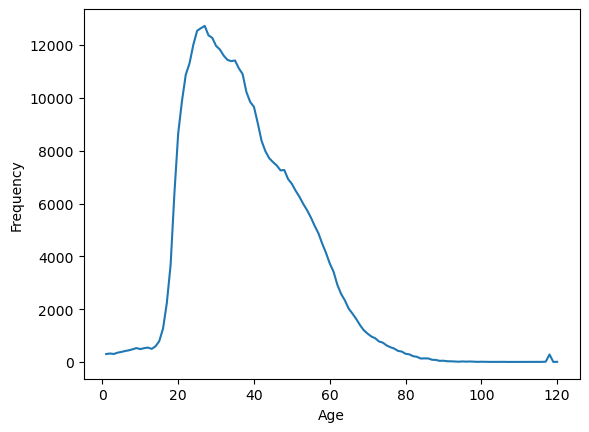

In [654]:
# fig, ax = pyplot.subplots()
# (actor_vial_2019.query("EDAD > 0")).EDAD.value_counts().sort_index().plot(kind="line")
plot = (actor_vial_s.query("EDAD > 0")).EDAD.value_counts().sort_index().plot(kind="line")

# Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Frequency')

# Display the plot`
plt.show()

In [691]:
actor_vial_s.query("EDAD >= 0").EDAD.describe()

count    414505.000000
mean         37.786374
std          14.193421
min           0.000000
25%          27.000000
50%          36.000000
75%          47.000000
max         120.000000
Name: EDAD, dtype: float64

In [694]:
actor_vial_s.query("EDAD == -1").EDAD.describe()

count    7911.0
mean       -1.0
std         0.0
min        -1.0
25%        -1.0
50%        -1.0
75%        -1.0
max        -1.0
Name: EDAD, dtype: float64

In [695]:
414505 + 7911

422416

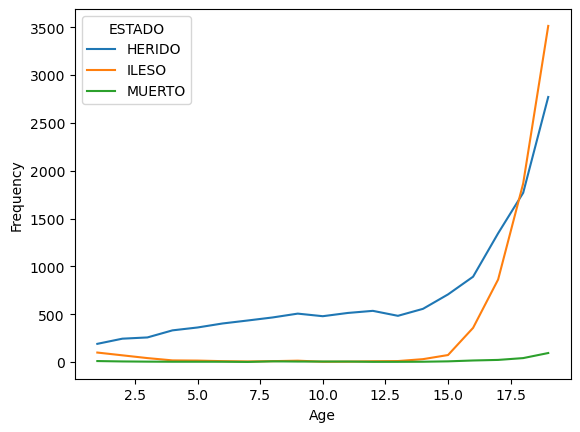

In [696]:
plot = (
    actor_vial_s.query("EDAD >  0 and EDAD < 20")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [143]:
# Change all si to -1
# actor_vial_2019['EDAD'] = actor_vial_2019['EDAD'].replace(to_replace='SIN INFORMACION', value='-1')
# actor_vial_2019['EDAD'] = actor_vial_2019['EDAD'].astype('int')

# actor_vial_2019['EDAD'] = actor_vial_2019['EDAD'].replace(to_replace='SIN INFORMACION', value='-1')
# actor_vial_2019['EDAD'] = actor_vial_2019['EDAD'].astype('int')



# Graph with incidents over time of day (2019)

In [658]:
import warnings
warnings.filterwarnings("ignore")
def latent_by_feature(df ,values: list ,feature_name: str) :
    for v in values:
        df_location = df.loc[df[feature_name] == v].cal.aggregate_events(feature_name, "datetime")
        model = lc.LatentCalendar(n_components=1, n_jobs=-1,)
        df_model = df_location.loc[df_location.sum(axis=1) > 0]
        model.fit(df_model)
        lc.plot.plot_model_components(model)
        plt.title(v)

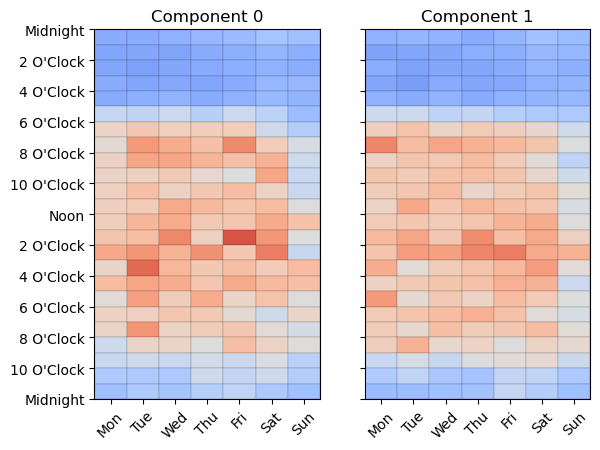

In [661]:
import warnings
warnings.filterwarnings("ignore")
test = siniestros_2019.loc[siniestros_2019["datetime"].between("2019-01-01","2020-01-01")]
# test["anchor"] = 1
df_location = test.cal.aggregate_events("anchor", "datetime")

model = lc.LatentCalendar(n_components=2, n_jobs=-1, random_state=4)

df_model = df_location.loc[df_location.sum(axis=1) > 0]
model.fit(df_model)

lc.plot.plot_model_components(model)

# Siniestros por diseño lugar

<Axes: xlabel='DISENO_LUGAR'>

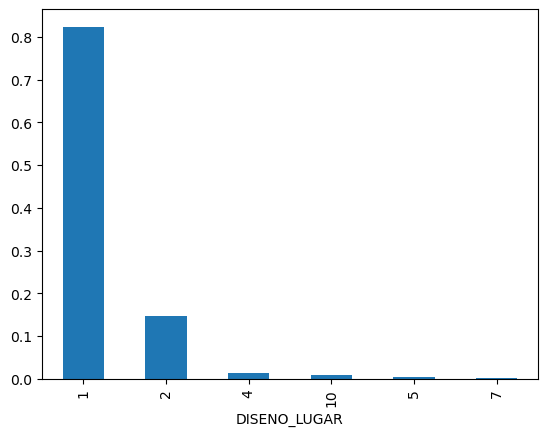

In [662]:
# for those who died
siniestros_2019.query("GRAVEDAD == 1").DISENO_LUGAR.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='DISENO_LUGAR'>

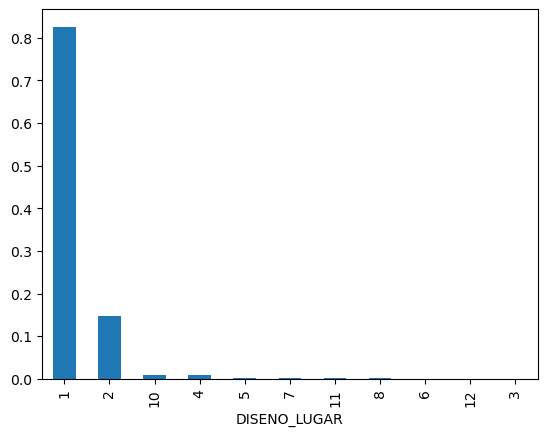

In [663]:
# This remains true for all data
siniestros_df.query("GRAVEDAD == 1").DISENO_LUGAR.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='DISENO_LUGAR'>

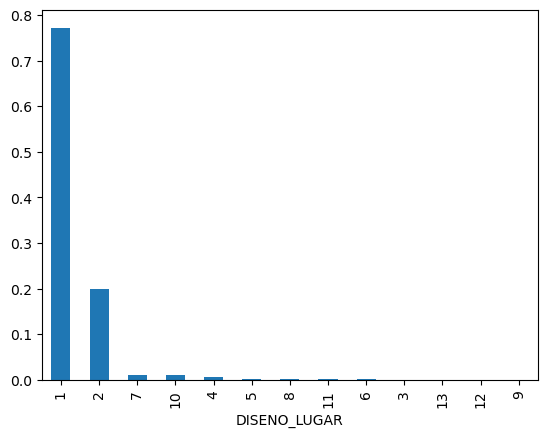

In [420]:
# in general
siniestros_2019.DISENO_LUGAR.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='DISENO_LUGAR'>

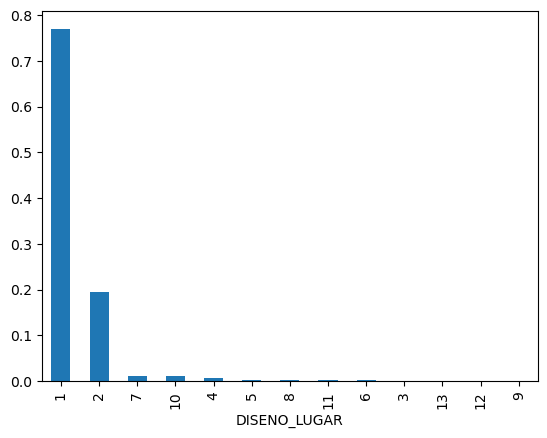

In [421]:
siniestros_df.DISENO_LUGAR.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE'>

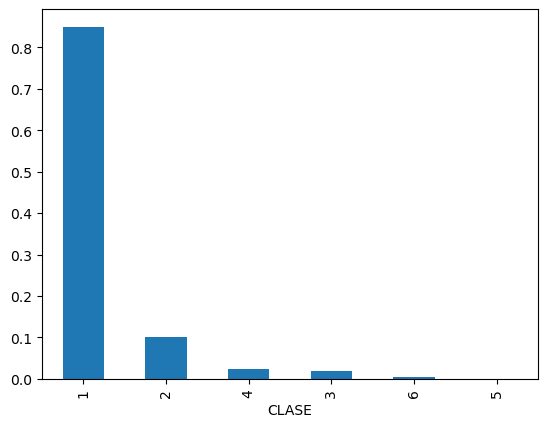

In [353]:
siniestros_2019.CLASE.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE'>

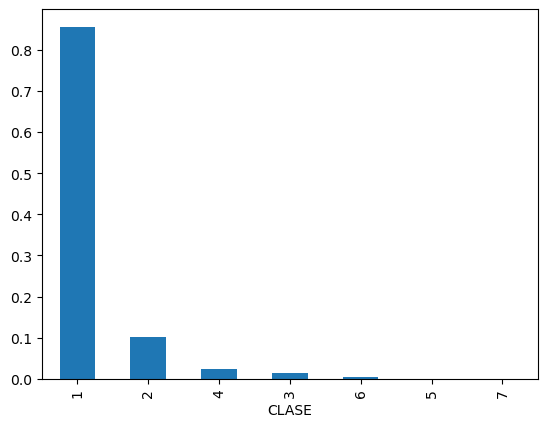

In [422]:
siniestros_df.CLASE.value_counts(normalize=1).plot(kind='bar')

In [426]:
def clean_hora(data):
    return data.split(":")[0]
siniestros_2019['hour'] = siniestros_2019['HORA'].apply(clean_hora)
siniestros_df['hour'] = siniestros_df['HORA'].apply(clean_hora)

<Axes: xlabel='hour'>

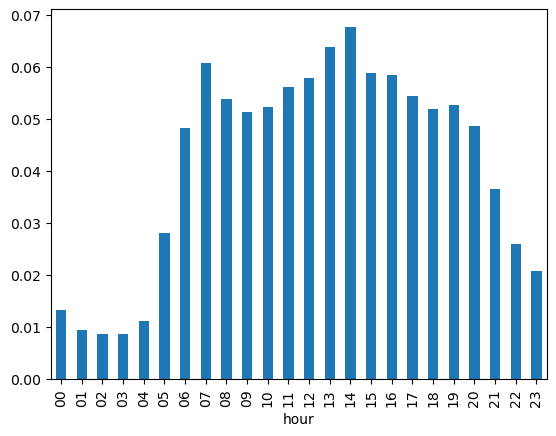

In [664]:
siniestros_2019.hour.value_counts(normalize=1).sort_index().plot(kind="bar")


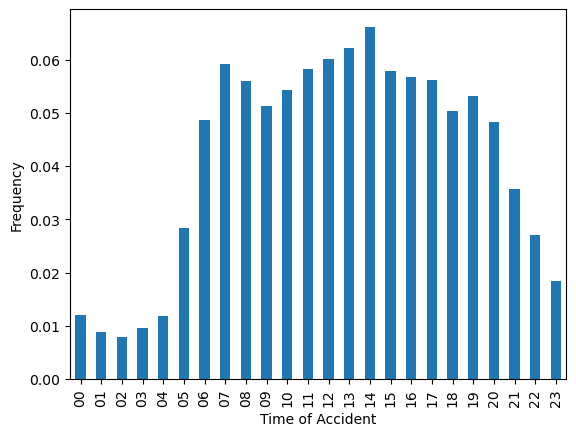

In [671]:
siniestros_df.hour.value_counts(normalize=1).sort_index().plot(kind="bar")
plt.xlabel('Time of Accident')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='hour'>

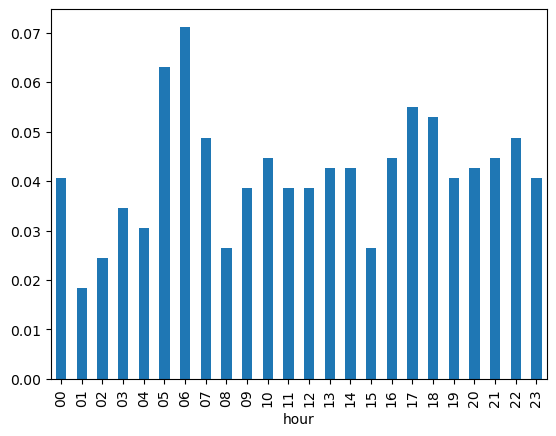

In [432]:
siniestros_2019.query("GRAVEDAD == 1").hour.value_counts(normalize=1).sort_index().plot(kind="bar")

<Axes: xlabel='hour'>

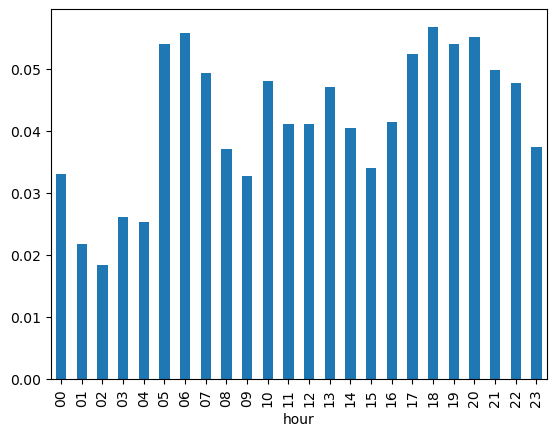

In [434]:
siniestros_df.query("GRAVEDAD == 1").hour.value_counts(normalize=1).sort_index().plot(kind="bar")

<Axes: xlabel='hour'>

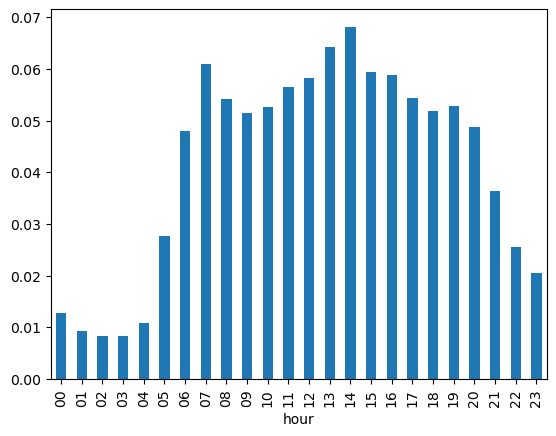

In [433]:
siniestros_2019.query("GRAVEDAD != 1").hour.value_counts(normalize=1).sort_index().plot(kind="bar")

<Axes: xlabel='hour'>

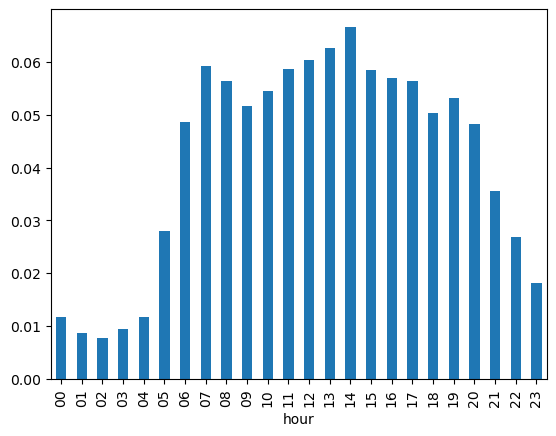

In [435]:
siniestros_df.query("GRAVEDAD != 1").hour.value_counts(normalize=1).sort_index().plot(kind="bar")

<Axes: xlabel='OBJETO_FIJO'>

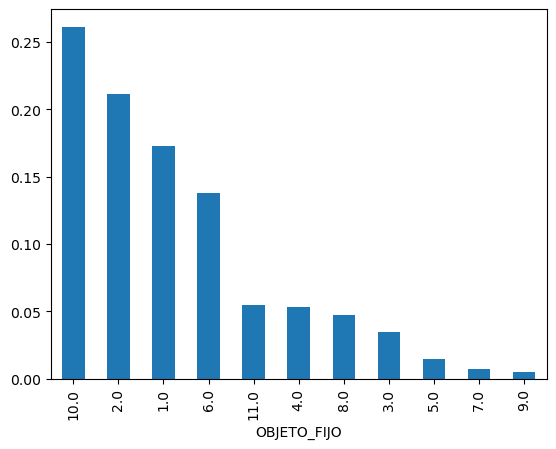

In [436]:
siniestros_2019.OBJETO_FIJO.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='OBJETO_FIJO'>

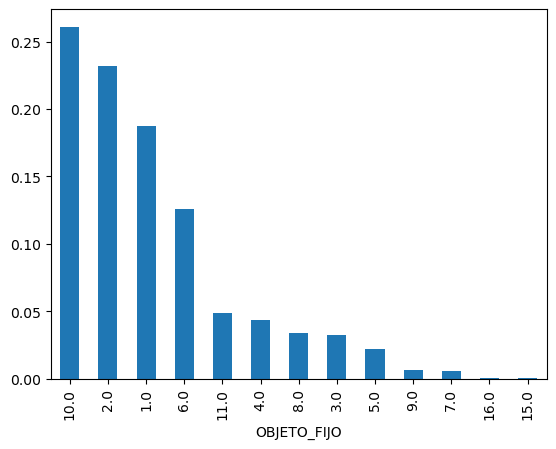

In [644]:
siniestros_df.OBJETO_FIJO.value_counts(normalize=1).plot(kind='bar')

# Hypothisis

<Axes: xlabel='CODIGO_CAUSA'>

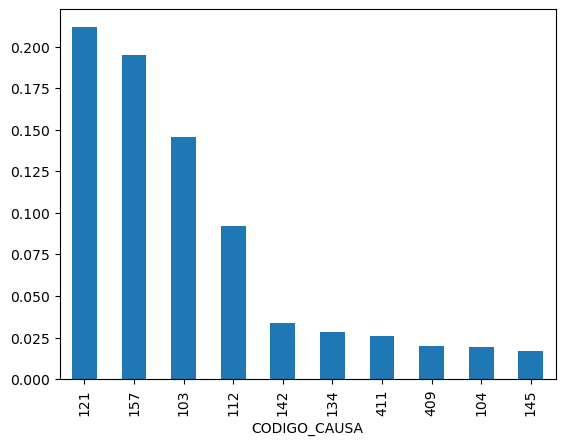

In [645]:
hipothesis_2019.CODIGO_CAUSA.value_counts(normalize=1)[0:10].plot(kind='bar')

# Vehiculos

In [371]:
vehiculos_2019.CLASE_x.value_counts(normalize=1)

CLASE_x
1.0     0.409911
10.0    0.151939
5.0     0.144060
2.0     0.095029
4.0     0.054740
13.0    0.041367
6.0     0.040520
7.0     0.024423
8.0     0.014220
3.0     0.013250
9.0     0.009911
28.0    0.000385
14.0    0.000185
17.0    0.000046
24.0    0.000015
Name: proportion, dtype: float64

In [ ]:
vehiculos_df.CLASE.value_counts(normalize=1).plot(kind='bar')


<Axes: xlabel='CLASE_x'>

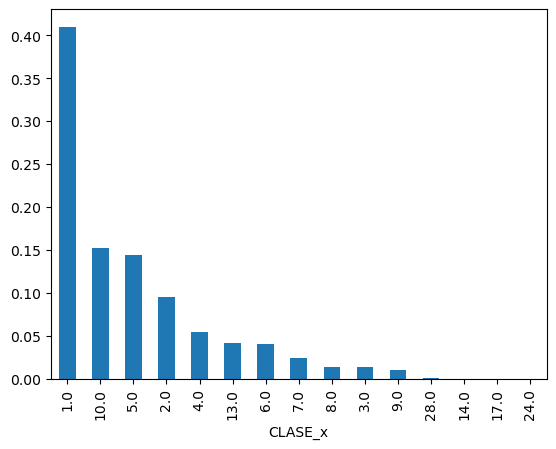

In [641]:
vehiculos_2019.CLASE_x.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE_x'>

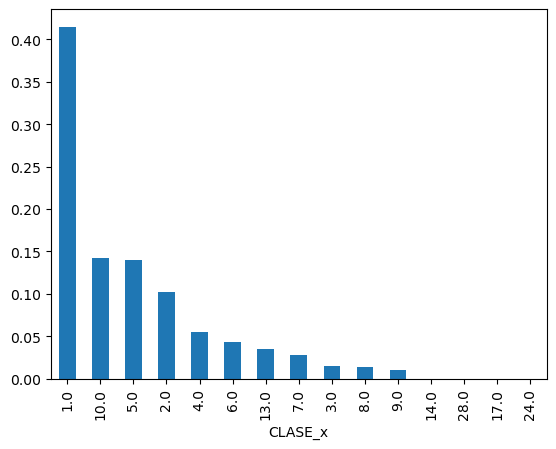

In [642]:
vehiculos_s.CLASE_x.value_counts(normalize=1).plot(kind='bar')

In [372]:
vehiculos_2019.query("GRAVEDAD==1").CLASE_x.value_counts(normalize=1)

CLASE_x
10.0    0.376389
2.0     0.123611
1.0     0.120833
13.0    0.112500
5.0     0.068056
4.0     0.061111
8.0     0.040278
3.0     0.029167
7.0     0.026389
9.0     0.022222
6.0     0.016667
28.0    0.002778
Name: proportion, dtype: float64

<Axes: xlabel='CLASE_x'>

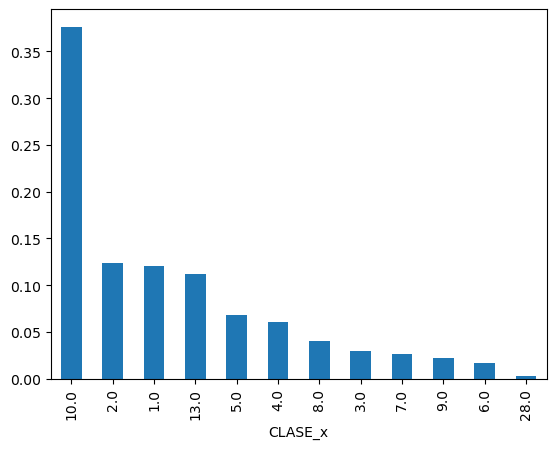

In [359]:
vehiculos_2019.query("GRAVEDAD==1").CLASE_x.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE_x'>

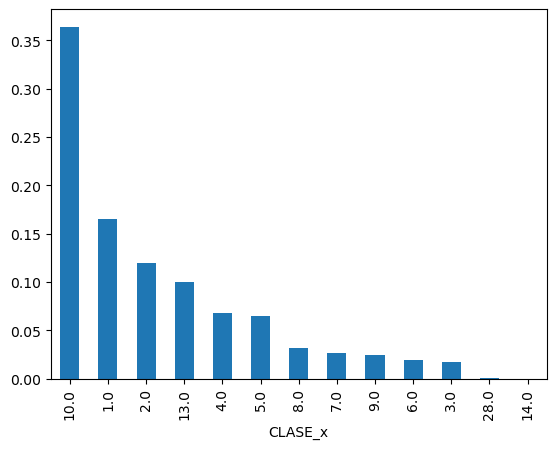

In [456]:
vehiculos_s.query("GRAVEDAD==1").CLASE_x.value_counts(normalize=1).plot(kind='bar')

<Axes: xlabel='CLASE_x'>

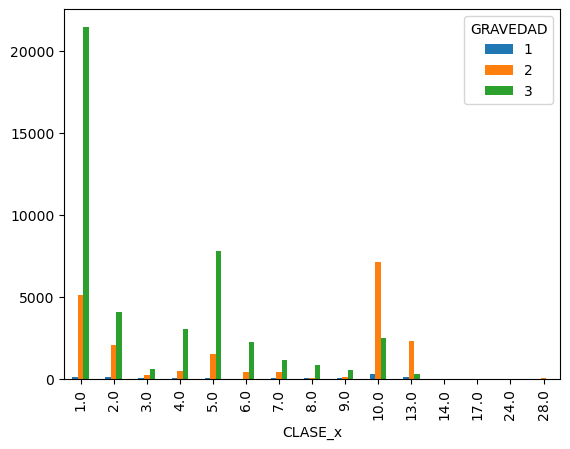

In [457]:
(vehiculos_2019#.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="CLASE_x"), "GRAVEDAD"])
    .size()b
    .unstack()
    .plot(kind="bar")
)

<Axes: xlabel='CLASE_x'>

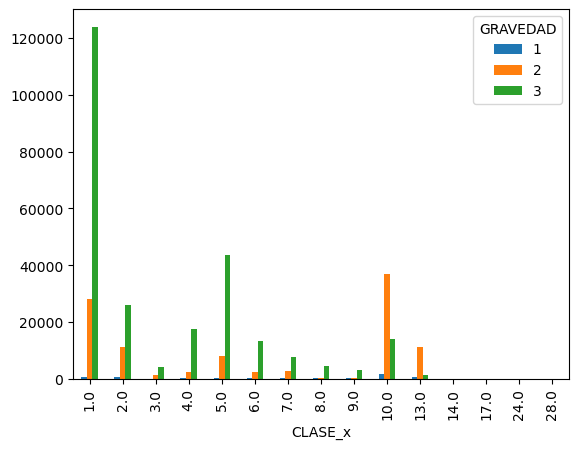

In [458]:
(vehiculos_s#.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="CLASE_x"), "GRAVEDAD"])
    .size()
    .unstack()
    .plot(kind="bar")
)

# Actor Vial 

Text(0, 0.5, 'Frequency')

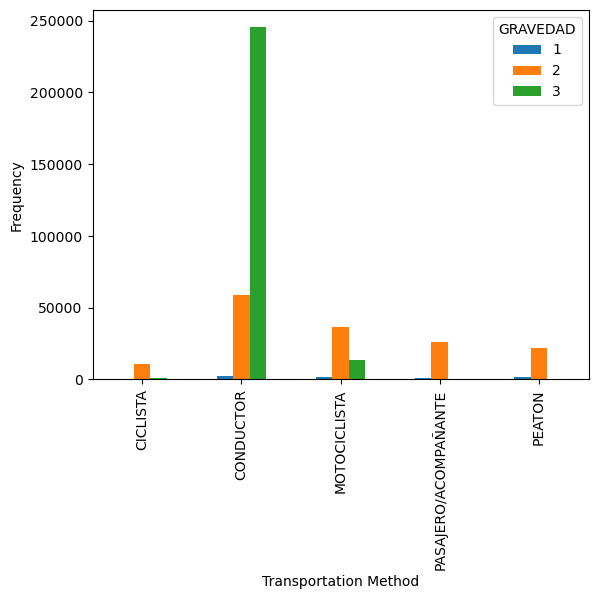

In [680]:
# note that pasajeros have nearly no uninjured people
plot= (
    actor_vial_s#.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="CONDICION"), "GRAVEDAD"])
    .size()
    .unstack()
    .plot(kind="bar")
)
plt.xlabel("Transportation Method")
plt.ylabel("Frequency")


In [715]:
actor_vial_df.CONDICION.value_counts()

CONDICION
CONDUCTOR               306534
MOTOCICLISTA             52290
PASAJERO/ACOMPAÑANTE     27365
PEATON                   23447
CICLISTA                 12780
Name: count, dtype: int64

In [719]:
actor_vial_df.query("CONDICION == 'MOTOCICLISTA'").ESTADO.value_counts(normalize=1)

ESTADO
HERIDO    0.553739
ILESO     0.429489
MUERTO    0.016772
Name: proportion, dtype: float64

In [720]:
actor_vial_df.query("CONDICION == 'CONDUCTOR'").ESTADO.value_counts(normalize=1)

ESTADO
ILESO     0.979402
HERIDO    0.020396
MUERTO    0.000202
Name: proportion, dtype: float64

In [721]:
actor_vial_df.query("CONDICION == 'PASAJERO/ACOMPAÑANTE'").ESTADO.value_counts(normalize=1)

ESTADO
HERIDO    0.988672
MUERTO    0.011255
ILESO     0.000073
Name: proportion, dtype: float64

In [722]:
actor_vial_df.query("CONDICION == 'PEATON'").ESTADO.value_counts(normalize=1)

ESTADO
HERIDO    0.938798
MUERTO    0.061117
ILESO     0.000085
Name: proportion, dtype: float64

<Axes: xlabel='EDAD'>

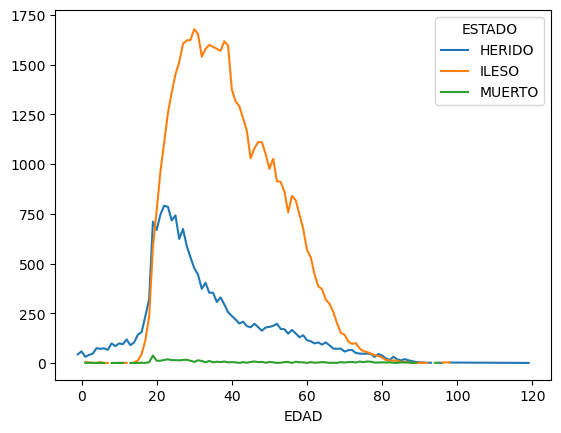

In [377]:
(
    actor_vial_2019# .query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

In [478]:

# actor_vial_s['EDAD'] = actor_vial_s['EDAD'].replace(to_replace='SIN INFORMACION', value='-1')
# actor_vial_s['EDAD'] = actor_vial_s['EDAD'].astype('int')
# actor_vial_s

<Axes: xlabel='EDAD'>

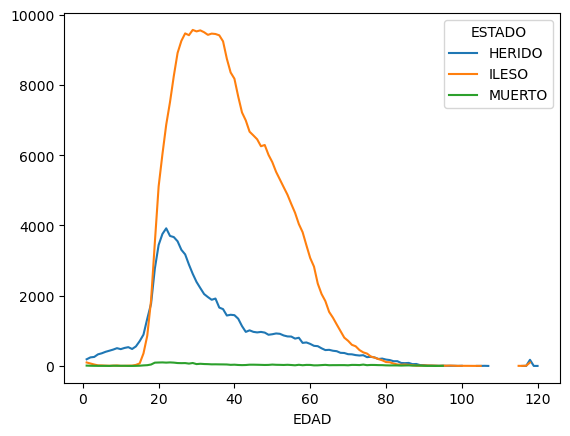

In [499]:
(
    actor_vial_s.query("EDAD > 0") # .query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

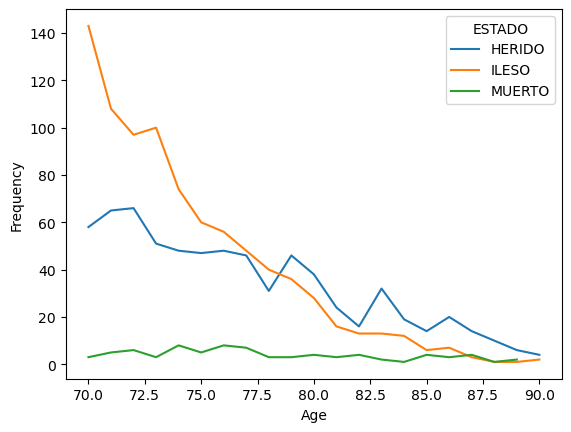

In [677]:
(
    actor_vial_2019.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

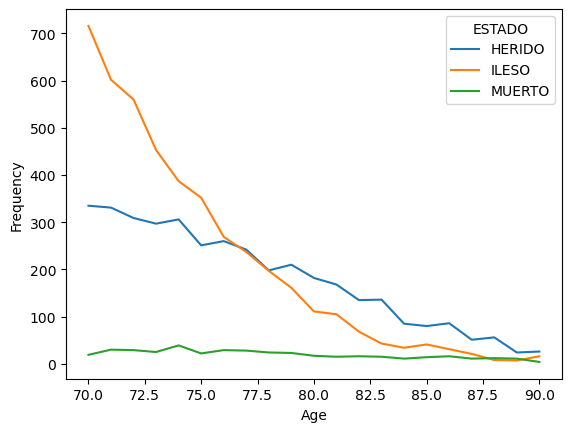

In [678]:
(
    actor_vial_s.query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='EDAD'>

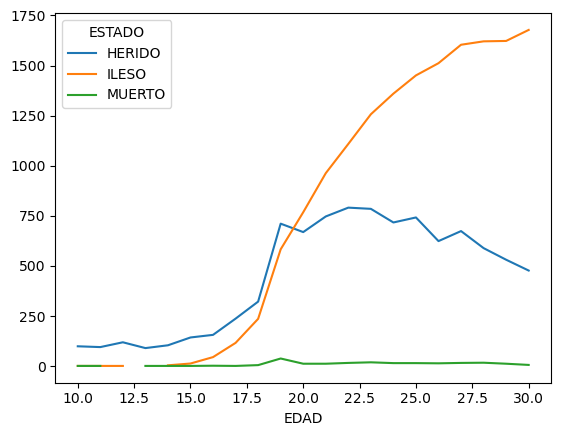

In [483]:
(
    actor_vial_2019.query("EDAD >=  10 and EDAD <= 30")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

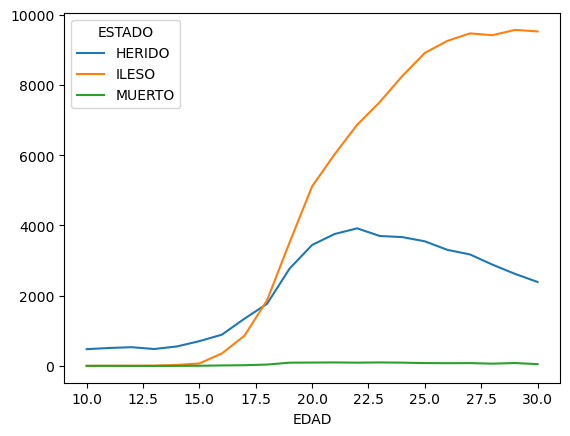

In [484]:
(
    actor_vial_s.query("EDAD >=  10 and EDAD <= 30")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

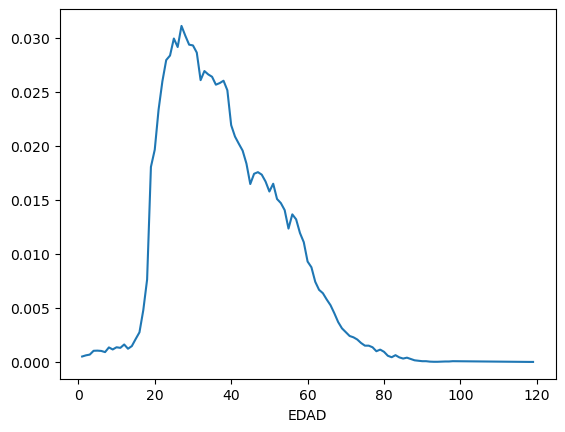

In [496]:
actor_vial_2019.query("EDAD > 0").EDAD.value_counts(normalize=1).sort_index().plot()


count    414222.000000
mean         37.812190
std          14.163851
min           1.000000
25%          27.000000
50%          36.000000
75%          47.000000
max         120.000000
Name: EDAD, dtype: float64

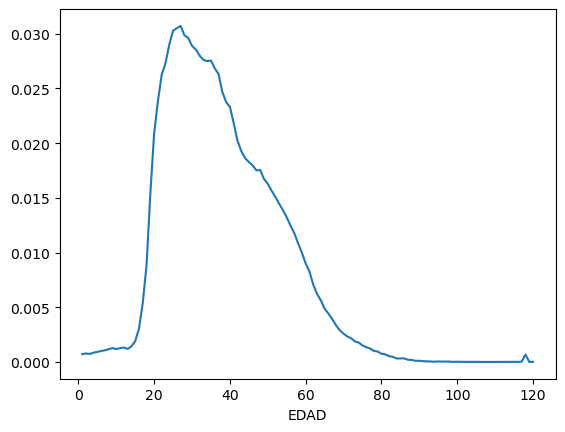

In [498]:
actor_vial_s.query("EDAD > 0").EDAD.value_counts(normalize=1).sort_index().plot()
actor_vial_s.query("EDAD > 0").EDAD.describe()

<Axes: xlabel='EDAD'>

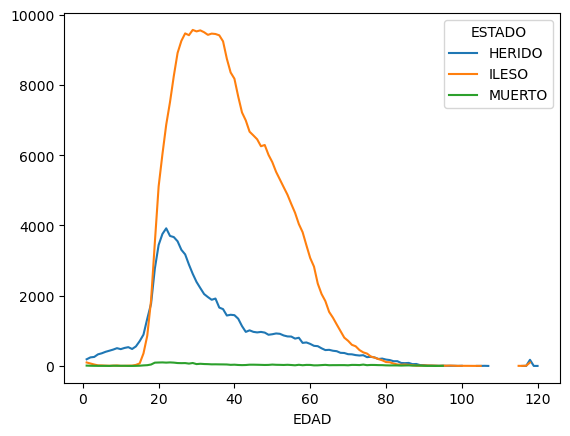

In [509]:
(
    actor_vial_s.query("EDAD > 0") # .query("EDAD >=  70 and EDAD <= 90")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

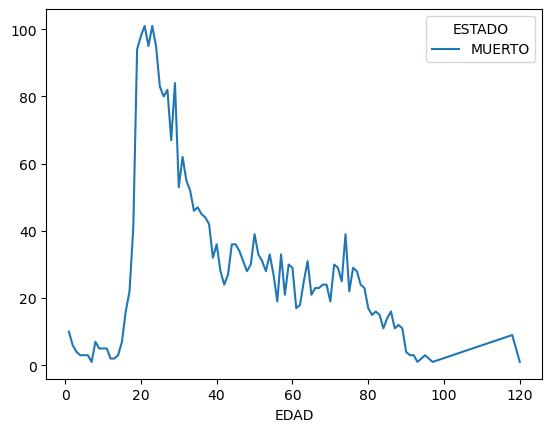

In [521]:
# actor_vial_s.query("ESTADO == 'MUERTO' and EDAD > 0")
(
    actor_vial_s.query("ESTADO == 'MUERTO' and EDAD > 0")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

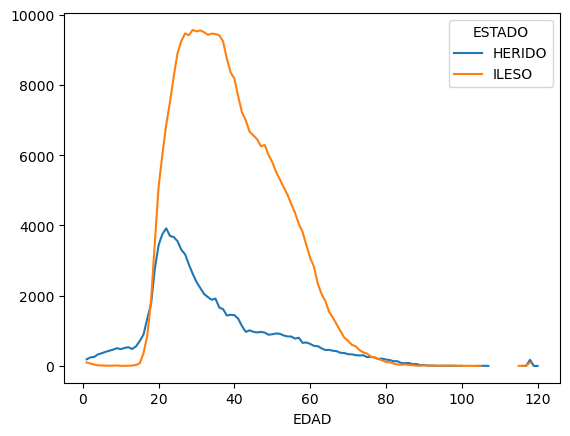

In [522]:
(
    actor_vial_s.query("ESTADO != 'MUERTO' and EDAD > 0")
    .groupby([pd.Grouper(key="EDAD"), "ESTADO"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

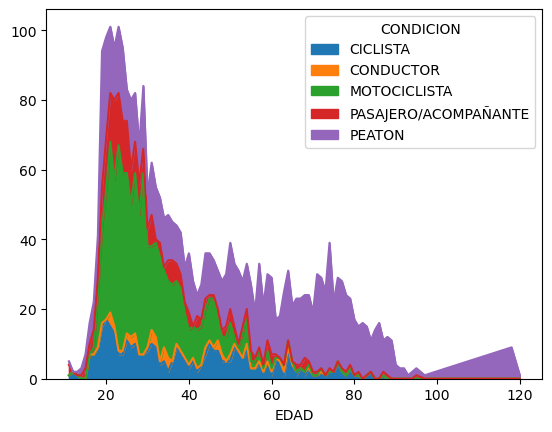

In [637]:
(
    actor_vial_s.query("ESTADO == 'MUERTO' and EDAD >10")
    .groupby([pd.Grouper(key="EDAD"), "CONDICION"])
    .size()
    .unstack()
    .plot(kind='area')
)

<Axes: xlabel='EDAD'>

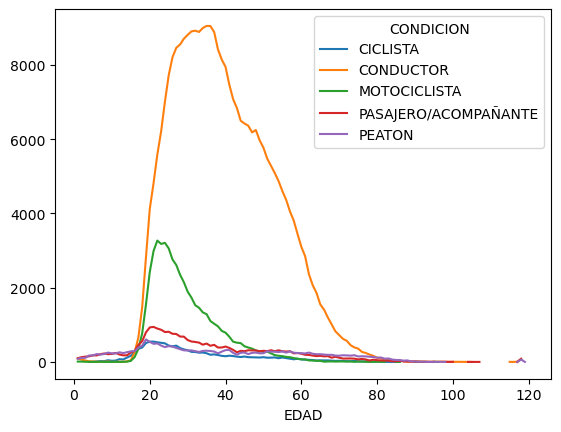

In [625]:
(
    actor_vial_s.query("ESTADO != 'MUERTO' and EDAD > 0")
    .groupby([pd.Grouper(key="EDAD"), "CONDICION"])
    .size()
    .unstack()
    .plot()
)

<Axes: xlabel='EDAD'>

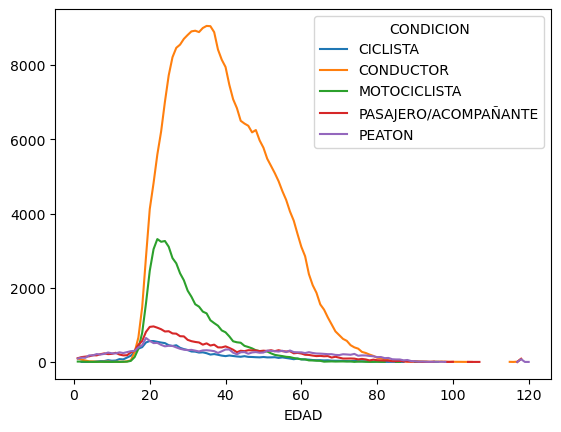

In [638]:
(
    actor_vial_s.query("EDAD > 0")
    .groupby([pd.Grouper(key="EDAD"), "CONDICION"])
    .size()
    .unstack()
    .plot()
)

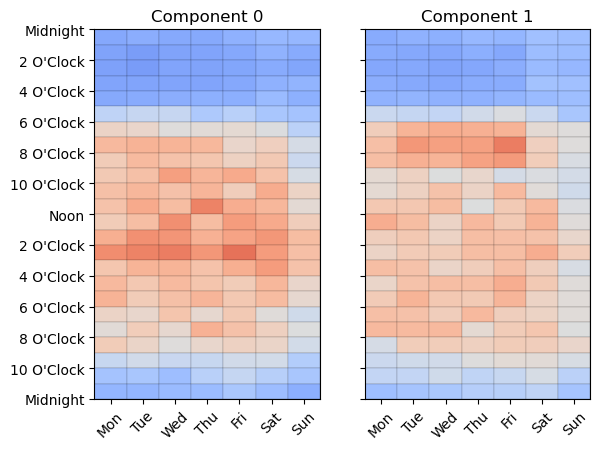

In [709]:
import warnings
warnings.filterwarnings("ignore")
df_location = actor_vial_s.cal.aggregate_events("ESTADO", "datetime")

model = lc.LatentCalendar(n_components=2, n_jobs=-1,random_state=0)

df_model = df_location.loc[df_location.sum(axis=1) > 0]
model.fit(df_model)

lc.plot.plot_model_components(model)

